In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# importing data
mpg=sns.load_dataset('mpg')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# dropping non-numeric columns
mpgT=mpg.drop(['origin', 'name'], axis=1)

In [5]:
mpgT.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [6]:
# verifying if all columns are integers
mpgT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [9]:
# changing floats to ints
mpgT.mpg=mpgT.mpg.astype(int)
mpgT.displacement=mpgT.displacement.astype(int)
mpgT.horsepower=mpgT.horsepower.astype(int)
mpgT.acceleration=mpgT.acceleration.astype(int)

In [8]:
# dropping na values
mpgT.dropna(inplace=True)

In [10]:
# performing kmeans
mpgKMean=KMeans(n_clusters=2)
mpgKMean.fit(mpgT)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [11]:
# adding group column to data
mpgT['Group']=mpgKMean.labels_

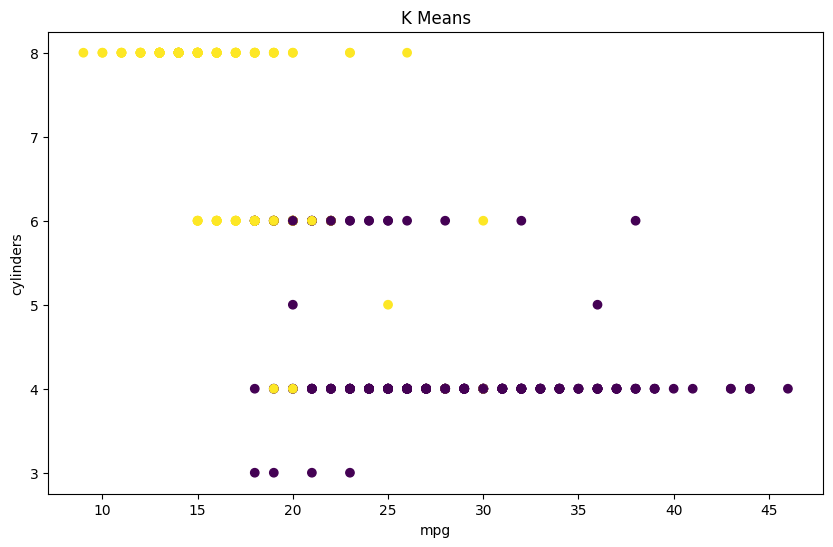

In [12]:
# plotting data - cylinders 
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('cylinders')
plt.scatter(mpgT['mpg'], mpgT['cylinders'], c=mpgKMean.labels_, cmap='viridis')

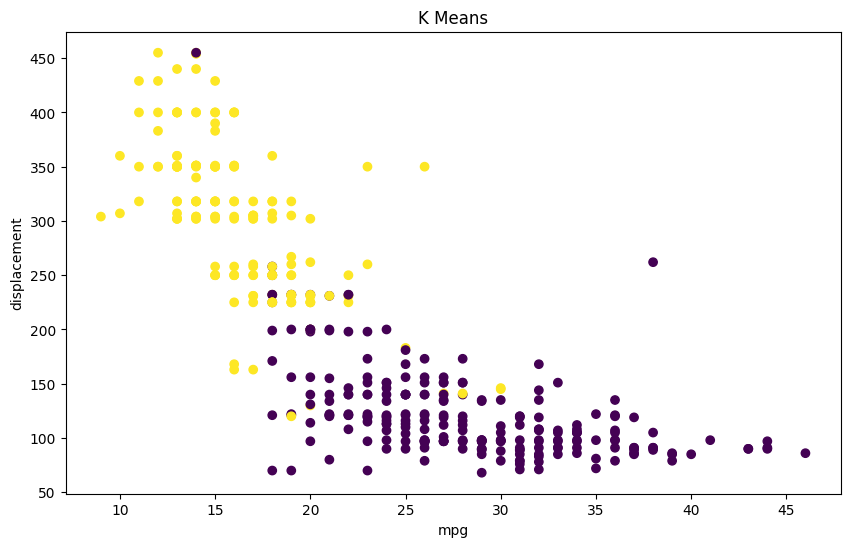

In [13]:
# plotting data - displacement
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.scatter(mpgT['mpg'], mpgT['displacement'], c=mpgKMean.labels_, cmap='viridis')

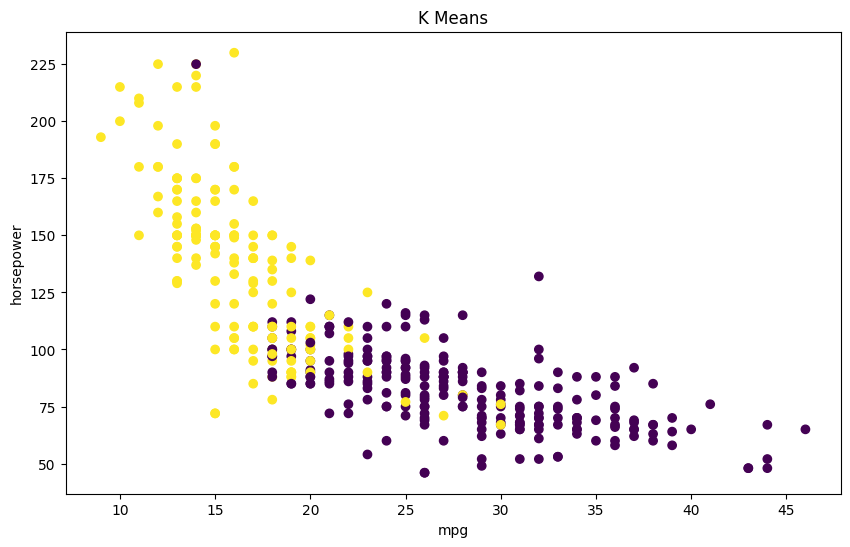

In [14]:
# plottind data - horsepower
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.scatter(mpgT['mpg'], mpgT['horsepower'], c=mpgKMean.labels_, cmap='viridis')

In [16]:
# checking data
mpgT.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,27.889831,4.305085,123.521186,82.593220,2381.381356,15.813559,76.783898
1,16.314103,7.237179,301.653846,137.564103,3879.532051,14.237179,74.762821


In [17]:
# performing kmeans (3 clusters)
mpgKMean=KMeans(n_clusters=3)
mpgKMean.fit(mpgT)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
# adding group column to data
mpgT['Group']=mpgKMean.labels_

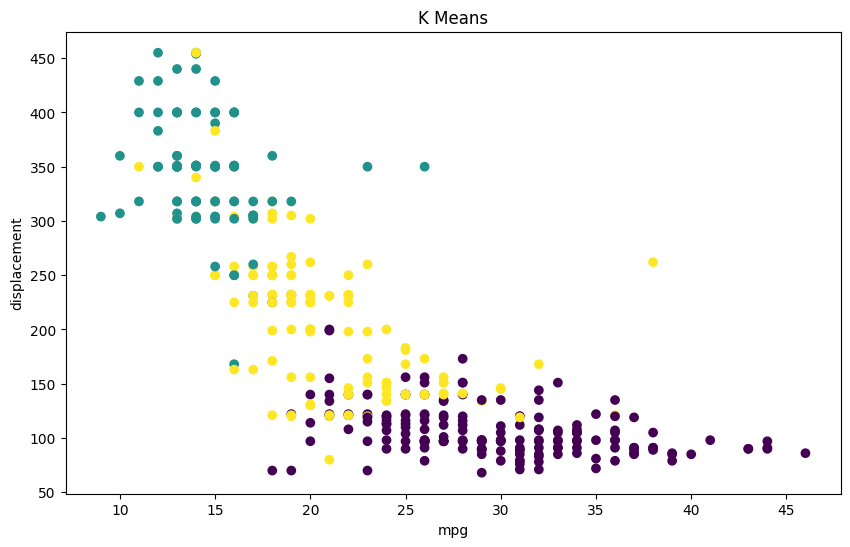

In [19]:
# plotting data - displacement
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.scatter(mpgT['mpg'], mpgT['displacement'], c=mpgKMean.labels_, cmap='viridis')

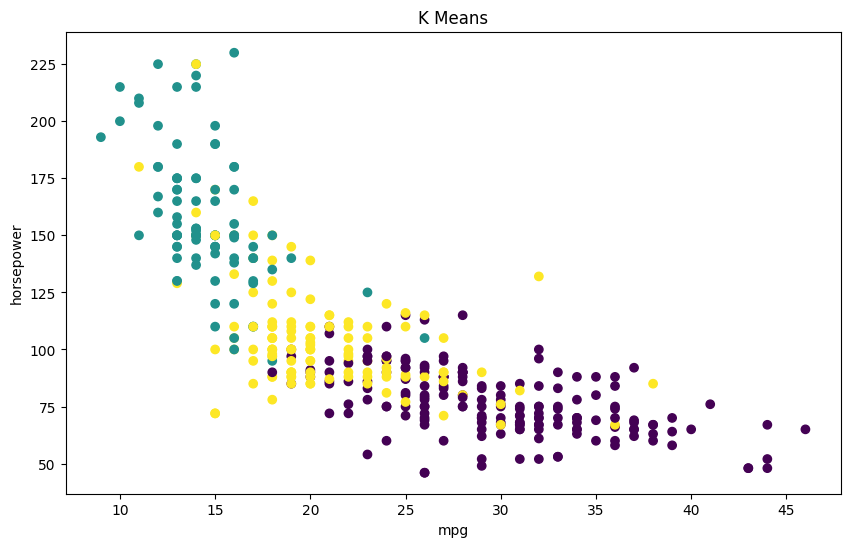

In [20]:
# plottind data - horsepower
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.scatter(mpgT['mpg'], mpgT['horsepower'], c=mpgKMean.labels_, cmap='viridis')

In [21]:
# checking data
mpgT.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111
1,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111
2,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459


In [22]:
# performing kmean (4 clusters)
mpgKMean=KMeans(n_clusters=4)
mpgKMean.fit(mpgT)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [24]:
# adding group column to data
mpgT['Group']=mpgKMean.labels_

In [25]:
# checking data
mpgT.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,13.898551,8.000000,356.536232,165.130435,4366.594203,12.782609,73.608696
1,30.566176,3.977941,98.125000,72.948529,2107.705882,16.205882,76.625000
2,18.179775,6.640449,259.966292,116.808989,3484.483146,15.337079,75.584270
3,24.418367,4.704082,154.346939,94.295918,2746.438776,15.326531,77.112245


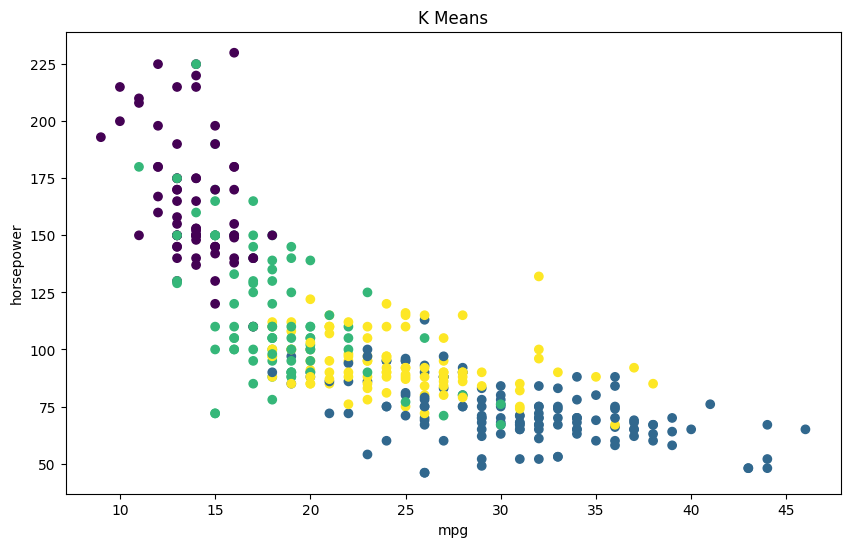

In [26]:
# plotting data
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.scatter(mpgT['mpg'], mpgT['horsepower'], c=mpgKMean.labels_, cmap='viridis')

In [27]:
# KNN analysis - scaling data
mpgScale=StandardScaler()
mpgScale.fit(mpgT.drop('Group', axis=1))
mpgScaleVars=mpgScale.transform(mpgT.drop('Group', axis=1))
scaled=pd.DataFrame(mpgScaleVars, columns=mpgT.columns[:-1])

In [28]:
scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.682931,1.483947,1.077290,0.664133,0.620540,-1.162771,-1.625315
1,-1.070728,1.483947,1.488727,1.574594,0.843334,-1.527708,-1.625315
2,-0.682931,1.483947,1.182541,1.184397,0.540382,-1.527708,-1.625315
3,-0.941463,1.483947,1.048585,1.184397,0.536845,-1.162771,-1.625315
4,-0.812197,1.483947,1.029448,0.924265,0.555706,-1.892646,-1.625315


In [29]:
# dropping mpg column
scaled1=scaled.drop('mpg', axis=1)

In [30]:
# assigning variables
x=scaled1
y=mpgT['mpg']

In [31]:
# train test
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=101)

In [32]:
# elbow method
errorRate=[]
for i in range(1,40):
    mpgKNN=KNeighborsClassifier(n_neighbors=i)
    mpgKNN.fit(x_train, y_train)
    mpgPRED=mpgKNN.predict(x_test)
    errorRate.append(np.mean(mpgPRED != y_test))

Text(0, 0.5, 'Error Rate')

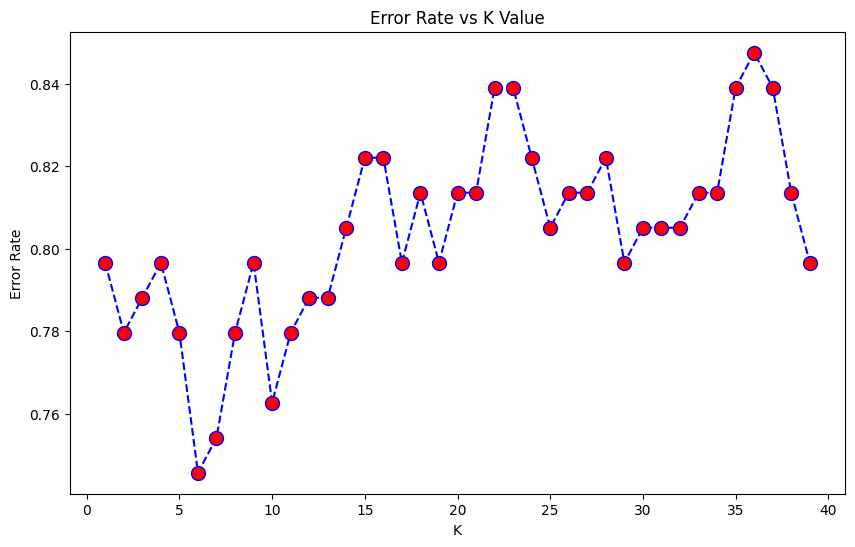

In [33]:
# plotting data
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
# 6 is the lowest point - k=6
mpgKNN=KNeighborsClassifier(n_neighbors=6)
mpgKNN.fit(x_train, y_train)
mpgPRED=mpgKNN.predict(x_test)

In [35]:
# confusion matrix
print(confusion_matrix(y_test, mpgPRED))

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 5 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 4 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

In [36]:
# class report
print(classification_report(y_test, mpgPRED))

              precision    recall  f1-score   support

          12       0.40      1.00      0.57         2
          13       0.50      0.50      0.50         8
          14       0.44      0.57      0.50         7
          15       0.25      0.25      0.25         8
          16       0.00      0.00      0.00         3
          17       0.17      0.20      0.18         5
          18       0.56      0.56      0.56         9
          19       0.17      0.14      0.15         7
          20       0.31      0.50      0.38         8
          21       0.00      0.00      0.00         4
          22       0.00      0.00      0.00         3
          23       0.50      0.14      0.22         7
          24       0.00      0.00      0.00         7
          25       0.17      0.17      0.17         6
          26       0.33      0.60      0.43         5
          27       0.33      0.20      0.25         5
          28       0.00      0.00      0.00         2
          29       0.33    

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# weighted avg 24%
## model with 3 clusters looks to be the most usable 
### reattempting KNN with 3 clusters - rerunning kmean
mpgKMean=KMeans(n_clusters=3)
mpgKMean.fit(mpgT)
mpgT['Group'] = mpgKMean.labels_
mpgT.head()

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Group
0,18,8,307,130,3504,12,70,2
1,15,8,350,165,3693,11,70,0
2,18,8,318,150,3436,11,70,2
3,16,8,304,150,3433,12,70,2
4,17,8,302,140,3449,10,70,2


In [49]:
mpgT.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111
1,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111
2,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459


In [50]:
# KNN analysis with group var
x=scaled1
y=mpgT['Group']

In [51]:
# train test
x_t1, x_tr1, y_t1, y_tr1=train_test_split(x,y, test_size=0.3, random_state=101)

In [52]:
# elbow method
errorRate=[]
for i in range(1,40):
    mpgKNN=KNeighborsClassifier(n_neighbors=i)
    mpgKNN.fit(x_tr1, y_tr1)
    mpgPRED=mpgKNN.predict(x_t1)
    errorRate.append(np.mean(mpgPRED != y_t1))

Text(0, 0.5, 'Error Rate')

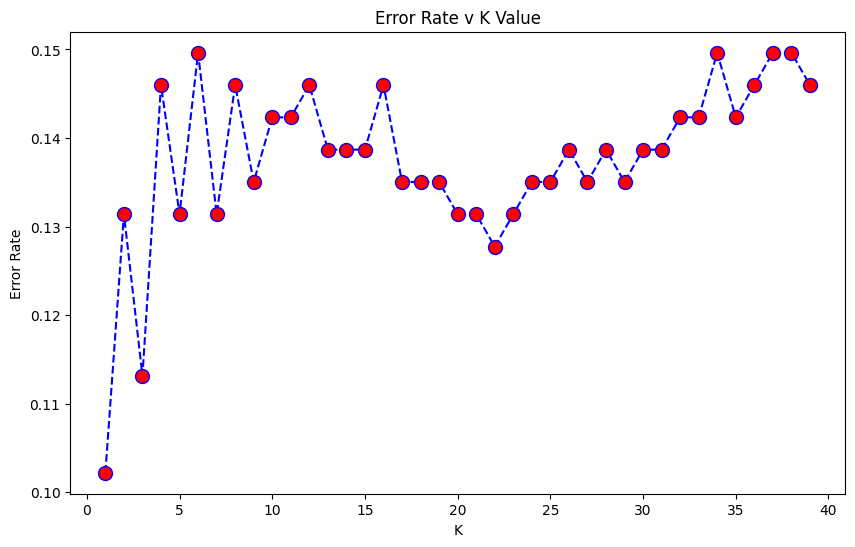

In [53]:
# plotting errorRate
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate v K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [58]:
# redoing KNN analysis - k=1 since it's the lowest point
mpgKNN=KNeighborsClassifier(n_neighbors=1)
mpgKNN.fit(x_tr1, y_tr1)
mpgPRED=mpgKNN.predict(x_t1)

In [59]:
# confusion matrix
print(confusion_matrix(y_t1, mpgPRED))

[[ 54   0   5]
 [  0 126   6]
 [  5  12  66]]


In [60]:
# class report
print(classification_report(y_t1, mpgPRED))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.91      0.95      0.93       132
           2       0.86      0.80      0.82        83

    accuracy                           0.90       274
   macro avg       0.90      0.89      0.89       274
weighted avg       0.90      0.90      0.90       274



In [57]:
# with the cluster of 3 and a k=1 the weighted average rose from 24% to 90%
## grouping by group means
mpgT.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111
1,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111
2,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459


In [1]:
# predicted group with 14.5 mpg 92% - highest of the predictions
## predicted group with 20.5 mpg 86% 
### predicted group with 29.4 mpg 91%